In [0]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder

## Loading the Dataset

Upload the file from dataset folder after running this cell

In [3]:
from google.colab import files
uploaded = files.upload()

Saving voice.csv to voice.csv


In [0]:
import io
train = pd.read_csv(io.BytesIO(uploaded['voice.csv']))


In [5]:
train.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,0.128324,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,0.011699,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


## The Features and the 'Target' variable

In [0]:
df=train.copy()

In [8]:
df.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,0.128324,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,0.011699,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [0]:
df.shape

In [10]:
df.index   

RangeIndex(start=0, stop=3168, step=1)

In [11]:
df.columns # give a short description of each feature.

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

#### Meaning of Each Column

**meanfreq**: mean frequency (in kHz)

**sd**: standard deviation of frequency

**median**: median frequency (in kHz)

**Q25**: first quantile (in kHz)

**Q75**: third quantile (in kHz)

**IQR**: interquantile range (in kHz)

**skew**: skewness (see note in specprop description)

**kurt**: kurtosis (see note in specprop description)

**sp.ent**: spectral entropy

**sfm**: spectral flatness

**mode**: mode frequency

**centroid**: frequency centroid (see specprop)

**peakf**: peak frequency (frequency with highest energy)

**meanfun**: average of fundamental frequency measured across acoustic signal

**minfun**: minimum fundamental frequency measured across acoustic signal

**maxfun**: maximum fundamental frequency measured across acoustic signal

**meandom**: average of dominant frequency measured across acoustic signal

**mindom**: minimum of dominant frequency measured across acoustic signal

**maxdom**: maximum of dominant frequency measured across acoustic signal

**dfrange**: range of dominant frequency measured across acoustic signal

**modindx**: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

**label**: male or female

## Missing Values Treatment

In [12]:
# check for null values.
df.isnull().any()   

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool

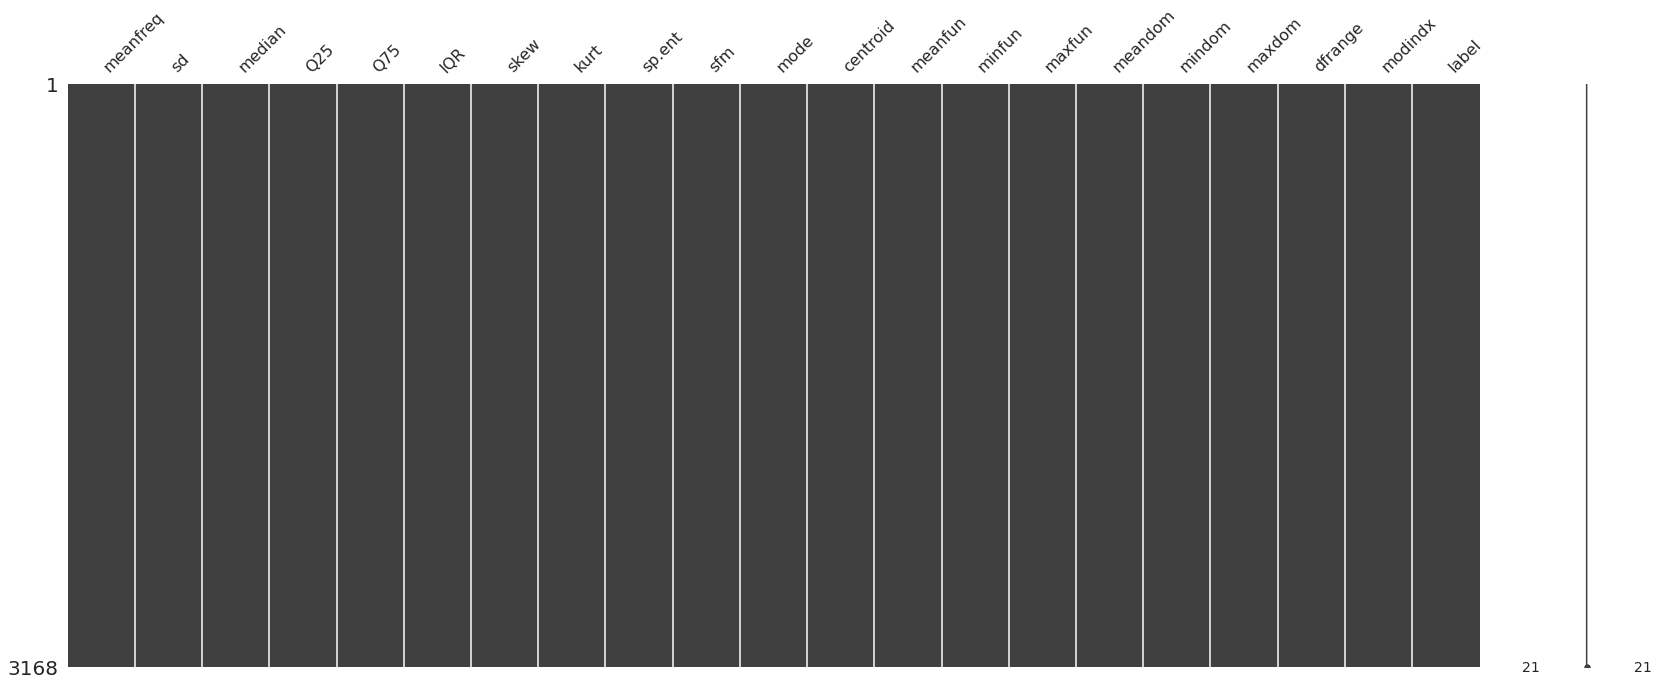

In [13]:
msno.matrix(df)  # just to visualize. no missing value.

## Univariate Analysis

In [14]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [0]:
def calc_limits(feature):
    q1,q3=df[feature].quantile([0.25,0.75])
    iqr=q3-q1
    rang=1.5*iqr
    return(q1-rang,q3+rang)

In [0]:
def plot(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=feature,ax=axes[0])
    sns.distplot(a=df[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)
    
    lower,upper = calc_limits(feature)
    l=[df[feature] for i in df[feature] if i>lower and i<upper] 
    print("Number of data points remaining if outliers removed : ",len(l))



Number of data points remaining if outliers removed :  3104


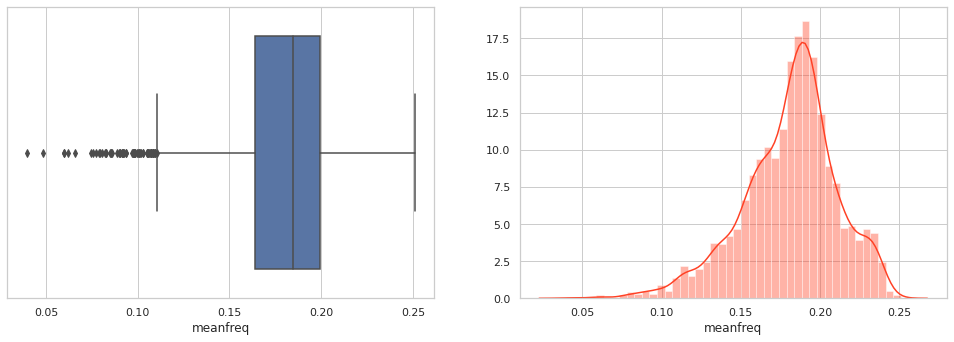

In [17]:
plot('meanfreq')

Number of data points remaining if outliers removed :  3158


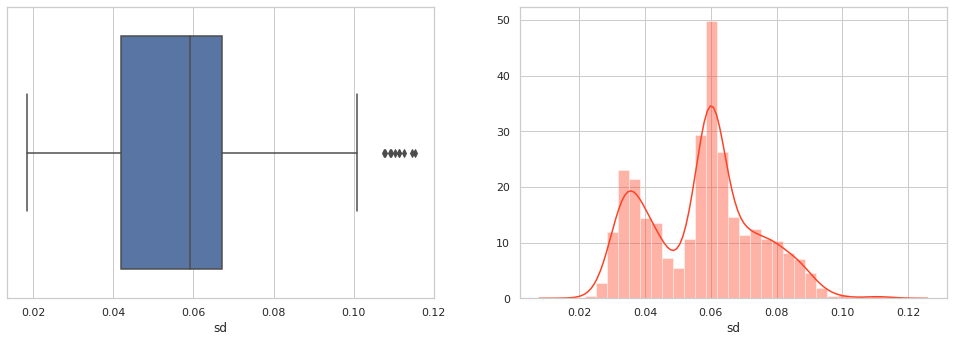

In [18]:
plot('sd')

Number of data points remaining if outliers removed :  3059


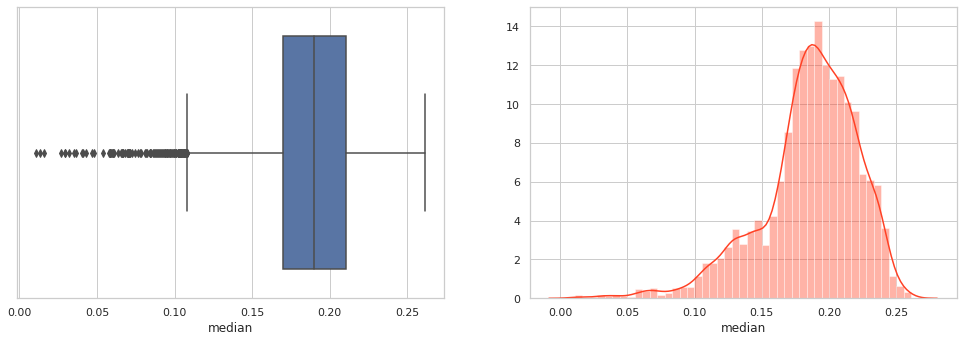

In [19]:
plot('median')

Number of data points remaining if outliers removed :  3135


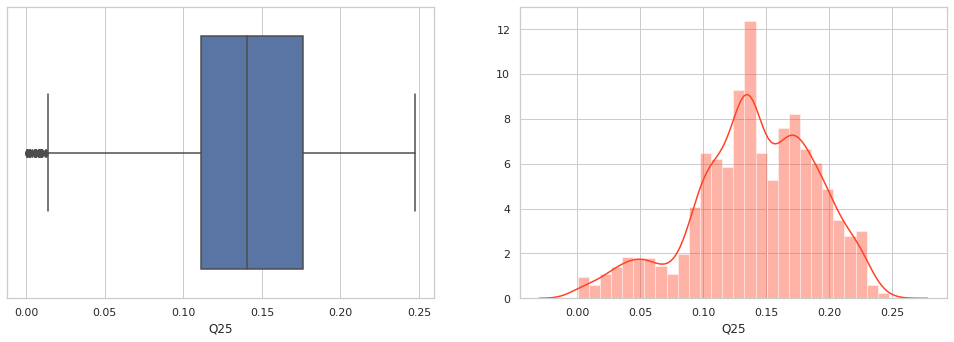

In [20]:
plot('Q25')

Number of data points remaining if outliers removed :  3158


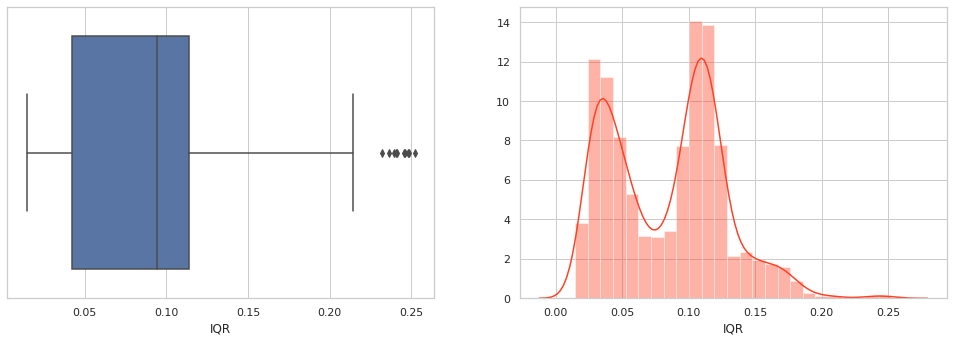

In [21]:
plot('IQR')

Number of data points remaining if outliers removed :  2938


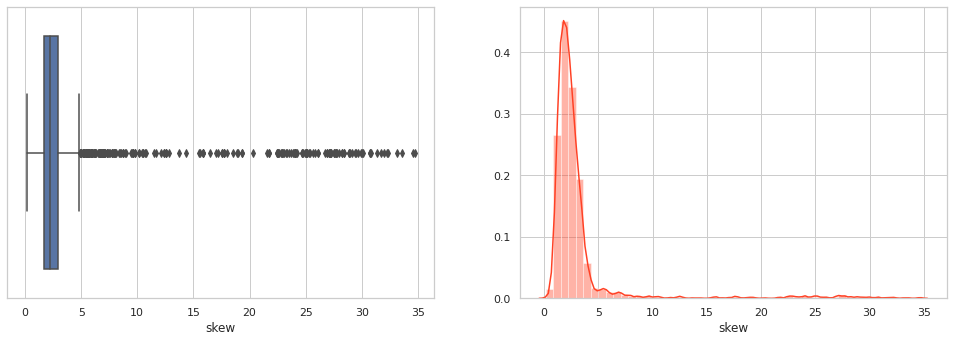

In [22]:
plot('skew')

Number of data points remaining if outliers removed :  2836


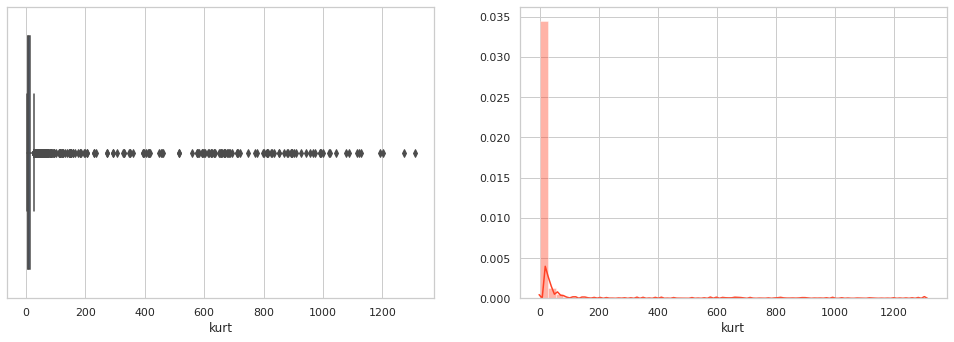

In [23]:
plot('kurt')

Number of data points remaining if outliers removed :  3162


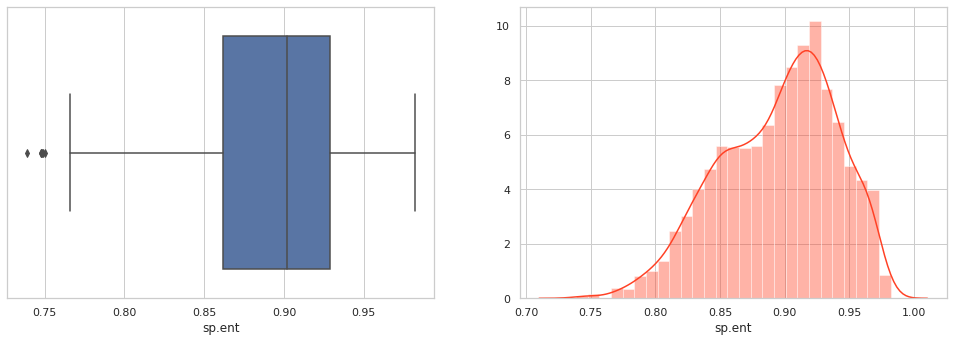

In [29]:
plot('sp.ent')

Number of data points remaining if outliers removed :  3168


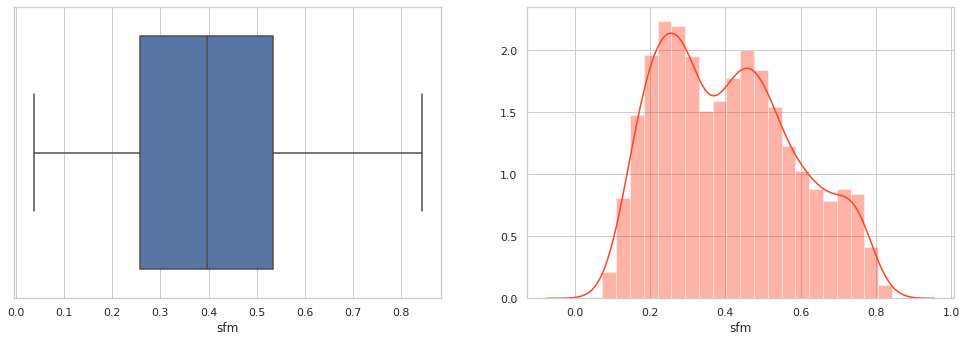

In [25]:
plot('sfm')

Number of data points remaining if outliers removed :  3168


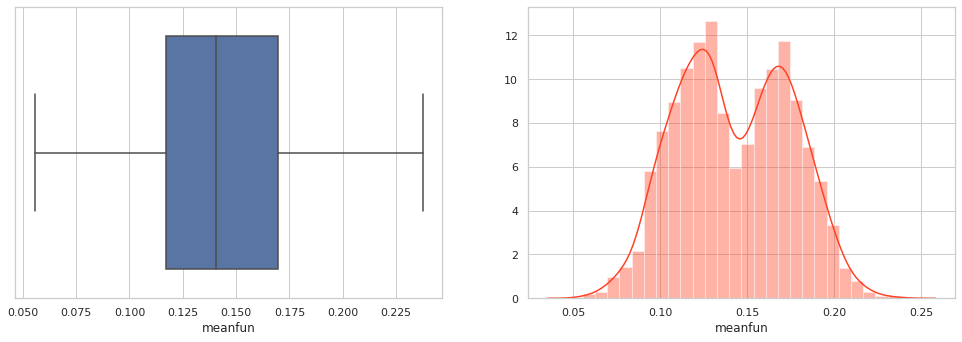

In [26]:
plot('meanfun')

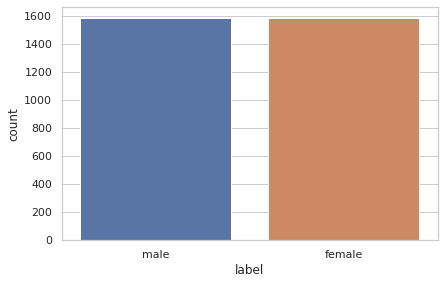

In [27]:
sns.countplot(data=df,x='label')

In [28]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

## Bivariate Analysis

## Corealtion b/w Features

In [0]:
temp = []
for i in df.label:
    if i == 'male':
        temp.append(1)
    else:
        temp.append(0)
df['label'] = temp

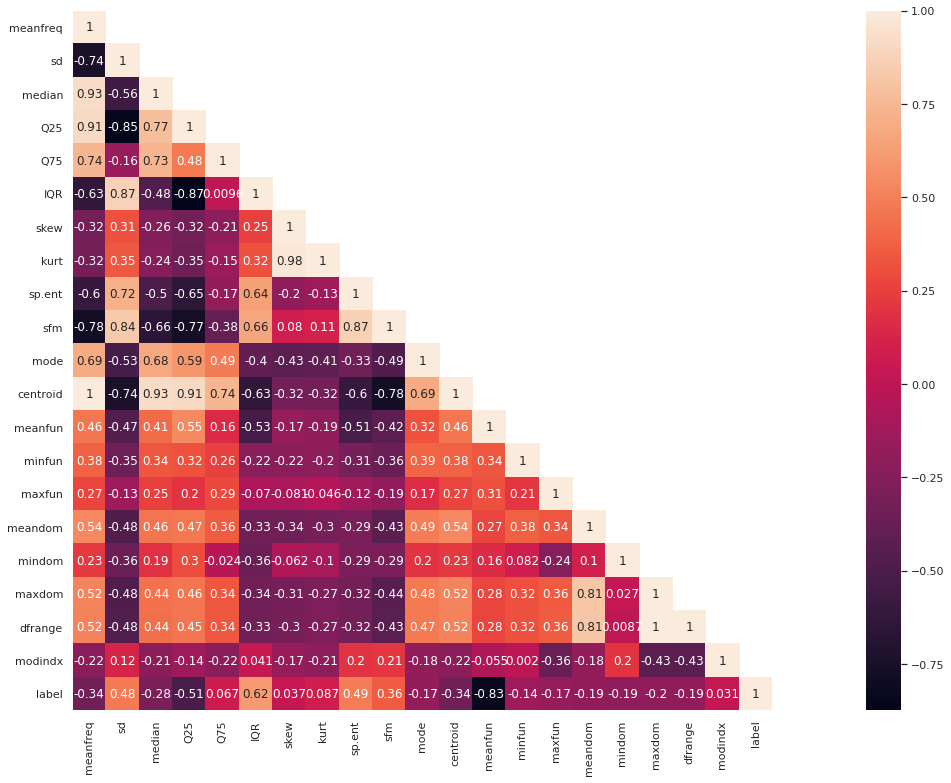

In [31]:
#corelation matrix.
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [0]:
df.drop('centroid',axis=1,inplace=True)

## Plotting the Features against the 'Target' variable

In [0]:
# drawing features against the target variable.

def plot_against_target(feature):
    sns.factorplot(data=df,y=feature,x='label',kind='box')
    fig=plt.gcf()
    fig.set_size_inches(7,7)

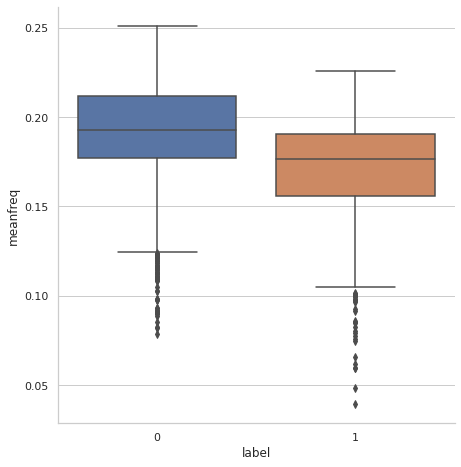

In [34]:
plot_against_target('meanfreq') # 0 for females and 1 for males.

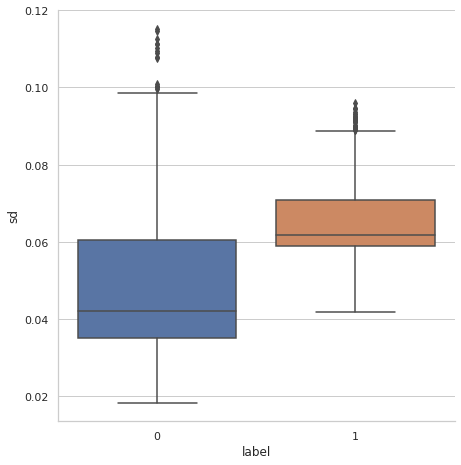

In [35]:
plot_against_target('sd')

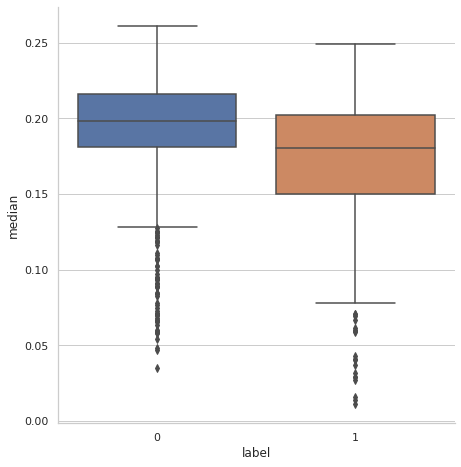

In [36]:
plot_against_target('median')

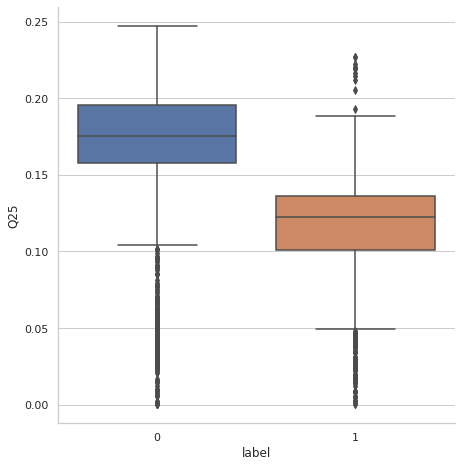

In [38]:
plot_against_target('Q25')

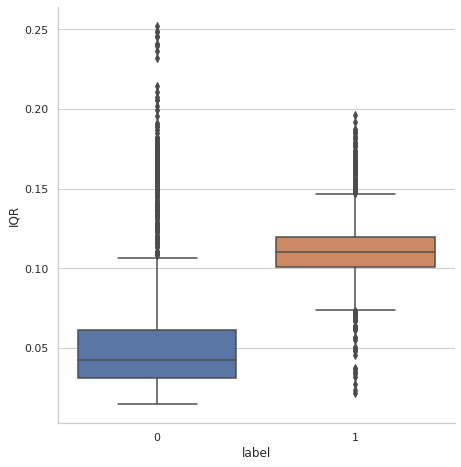

In [39]:
plot_against_target('IQR')

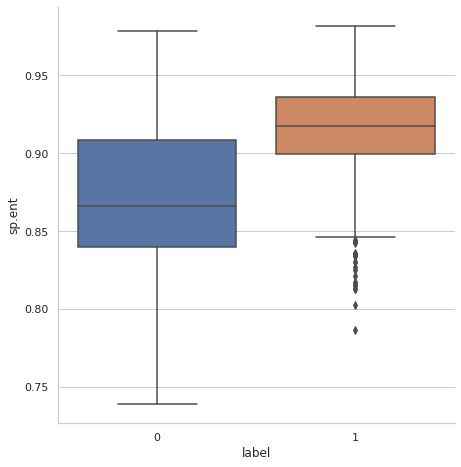

In [40]:
plot_against_target('sp.ent')

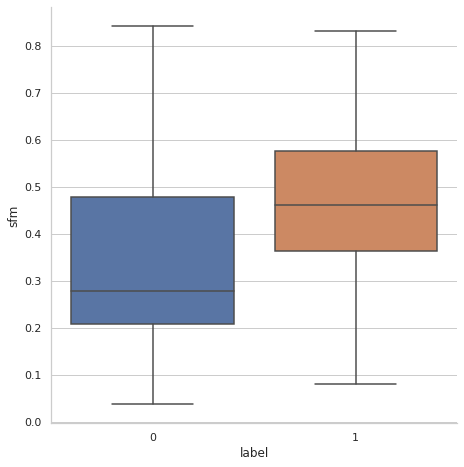

In [41]:
plot_against_target('sfm')

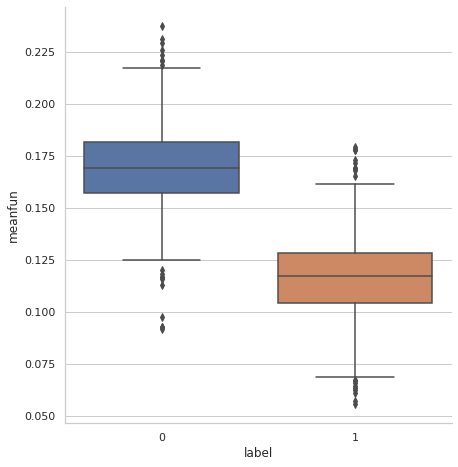

In [42]:
plot_against_target('meanfun')  

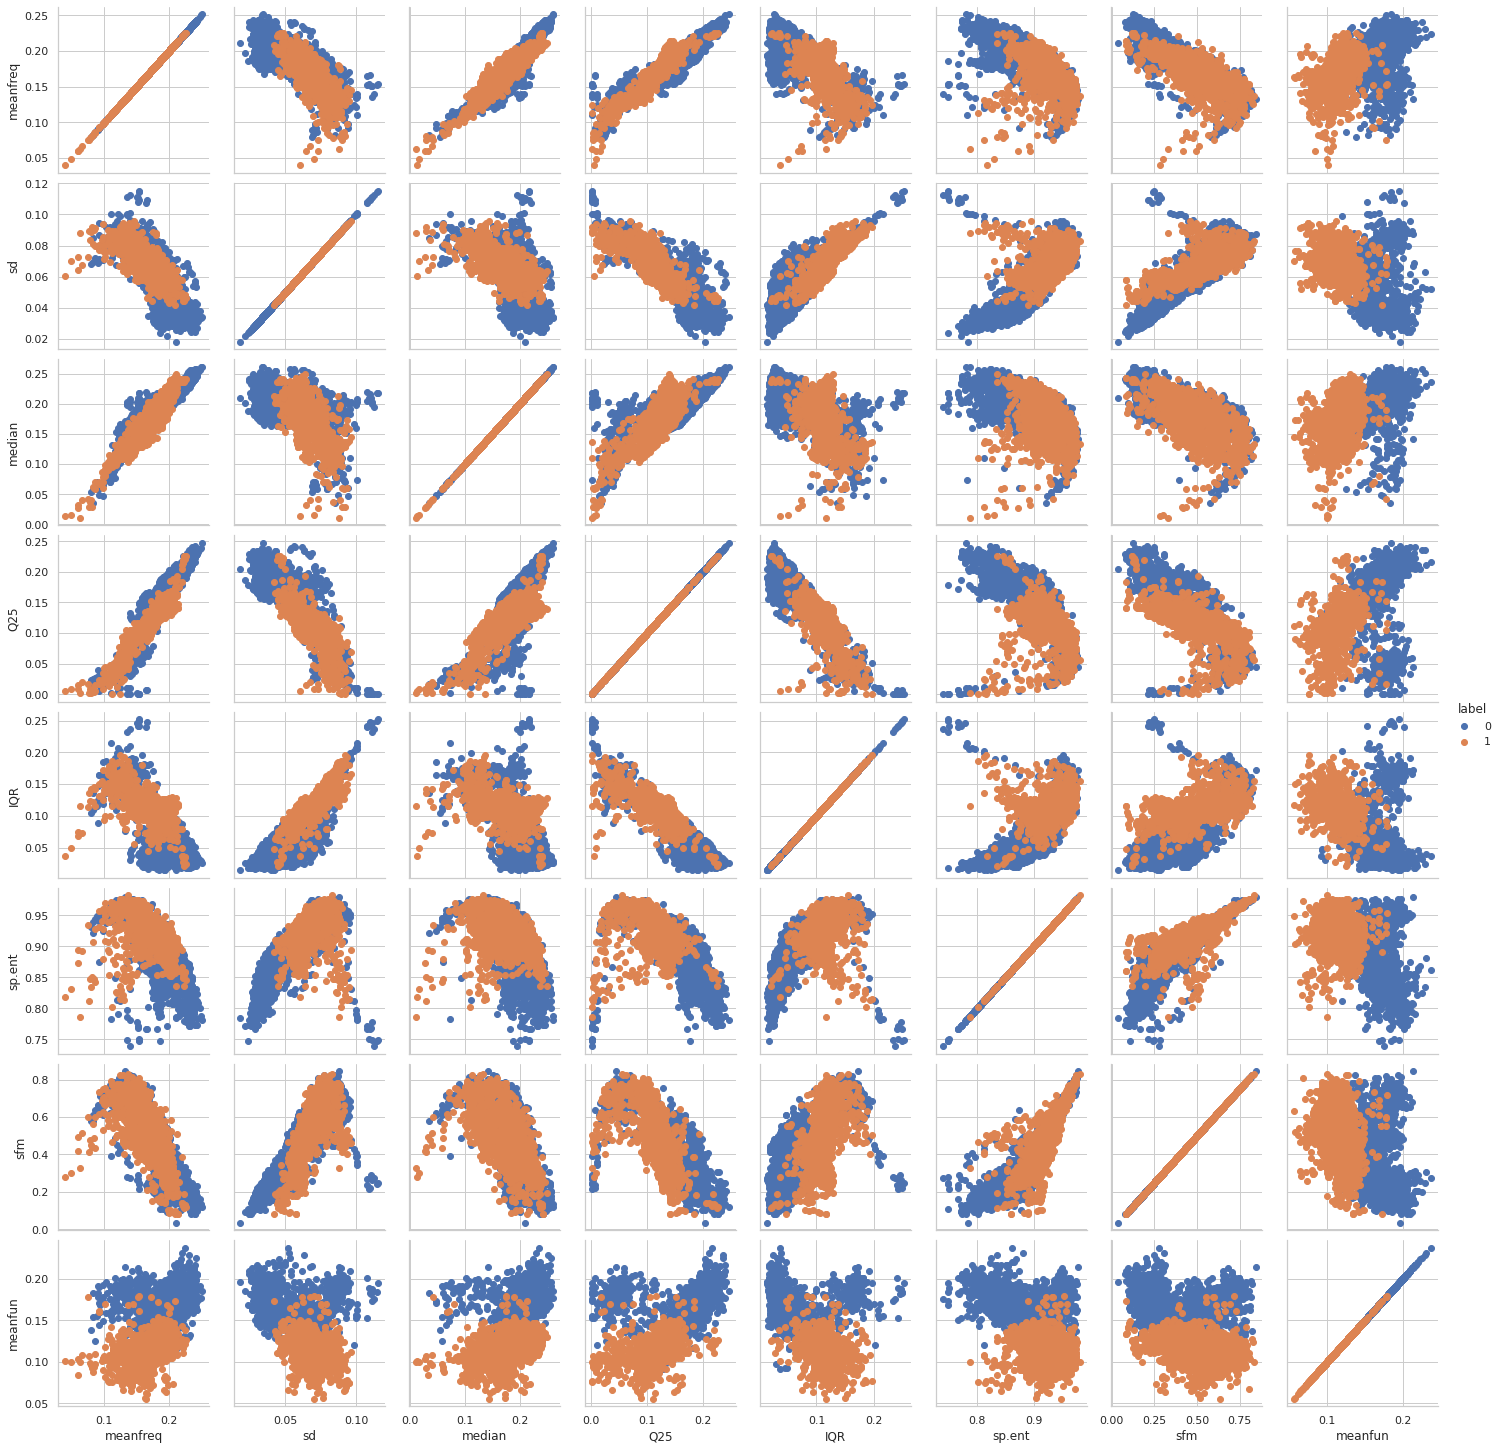

In [43]:
g = sns.PairGrid(df[['meanfreq','sd','median','Q25','IQR','sp.ent','sfm','meanfun','label']], hue = "label")
g = g.map(plt.scatter).add_legend()

## Outlier Treatment

In [0]:
# removal of any data point which is an outlier for any fetaure.
for col in df.columns:
    lower,upper=calc_limits(col)
    df = df[(df[col] >lower) & (df[col]<upper)]

In [45]:
df.shape

(1636, 20)

In [46]:
df.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,1
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,0.086197,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,1
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,0.219103,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,1
16,0.190846,0.065790,0.207951,0.132280,0.244357,0.112076,1.562304,7.834350,0.938546,0.538810,0.050129,0.113323,0.017544,0.275862,1.434115,0.007812,6.320312,6.312500,0.254780,1
18,0.168346,0.074121,0.145618,0.115756,0.239824,0.124068,2.704335,18.484703,0.934523,0.559742,0.060033,0.083484,0.015717,0.231884,0.146563,0.007812,3.125000,3.117188,0.059537,1
21,0.181015,0.074369,0.169299,0.128673,0.254175,0.125502,2.587325,12.281432,0.915284,0.475317,0.059957,0.098643,0.016145,0.275862,0.209844,0.007812,3.695312,3.687500,0.059940,1
32,0.175659,0.071652,0.144192,0.131058,0.256527,0.125469,3.736487,21.666669,0.876749,0.403910,0.134411,0.132726,0.016563,0.228571,0.257812,0.007812,0.648438,0.640625,0.203437,1
33,0.174826,0.071533,0.146471,0.123529,0.247059,0.123529,2.576732,10.110125,0.875392,0.436706,0.120000,0.124685,0.016754,0.250000,0.799006,0.007812,4.171875,4.164062,0.205816,1


## Feature Engineering.

In [47]:
temp_df=df.copy()

temp_df.drop(['skew','kurt','mindom','maxdom'],axis=1,inplace=True) # only one of maxdom and dfrange.
temp_df.head(10)
#df.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,dfrange,modindx,label
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,5.476562,0.208274,1
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,0.963181,0.738307,0.112555,0.110132,0.017112,0.253968,0.298222,2.718750,0.125160,1
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,0.967573,0.762638,0.086197,0.105945,0.026230,0.266667,0.479620,5.304688,0.123992,1
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,0.970723,0.770992,0.219103,0.096729,0.017957,0.250000,0.336476,2.156250,0.148272,1
16,0.190846,0.065790,0.207951,0.132280,0.244357,0.112076,0.938546,0.538810,0.050129,0.113323,0.017544,0.275862,1.434115,6.312500,0.254780,1
18,0.168346,0.074121,0.145618,0.115756,0.239824,0.124068,0.934523,0.559742,0.060033,0.083484,0.015717,0.231884,0.146563,3.117188,0.059537,1
21,0.181015,0.074369,0.169299,0.128673,0.254175,0.125502,0.915284,0.475317,0.059957,0.098643,0.016145,0.275862,0.209844,3.687500,0.059940,1
32,0.175659,0.071652,0.144192,0.131058,0.256527,0.125469,0.876749,0.403910,0.134411,0.132726,0.016563,0.228571,0.257812,0.640625,0.203437,1
33,0.174826,0.071533,0.146471,0.123529,0.247059,0.123529,0.875392,0.436706,0.120000,0.124685,0.016754,0.250000,0.799006,4.164062,0.205816,1


In [0]:
temp_df['meanfreq']=temp_df['meanfreq'].apply(lambda x:x*2)
temp_df['median']=temp_df['meanfreq']+temp_df['mode']
temp_df['median']=temp_df['median'].apply(lambda x:x/3)

In [49]:
temp_df.head(10) 

,meanfreq,sd,median,Q25,Q75,IQR,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,dfrange,modindx,label
3,0.302456,0.072111,0.128778,0.096582,0.207955,0.111374,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.554688,0.247119,1
4,0.270241,0.079146,0.124834,0.078720,0.206045,0.127325,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,5.476562,0.208274,1
5,0.265573,0.079557,0.126043,0.067958,0.209592,0.141634,0.963181,0.738307,0.112555,0.110132,0.017112,0.253968,0.298222,2.718750,0.125160,1
6,0.301525,0.074463,0.129240,0.092899,0.205718,0.112819,0.967573,0.762638,0.086197,0.105945,0.026230,0.266667,0.479620,5.304688,0.123992,1
8,0.284479,0.078018,0.167861,0.088206,0.208587,0.120381,0.970723,0.770992,0.219103,0.096729,0.017957,0.250000,0.336476,2.156250,0.148272,1
16,0.381693,0.065790,0.143941,0.132280,0.244357,0.112076,0.938546,0.538810,0.050129,0.113323,0.017544,0.275862,1.434115,6.312500,0.254780,1
18,0.336692,0.074121,0.132242,0.115756,0.239824,0.124068,0.934523,0.559742,0.060033,0.083484,0.015717,0.231884,0.146563,3.117188,0.059537,1
21,0.362031,0.074369,0.140663,0.128673,0.254175,0.125502,0.915284,0.475317,0.059957,0.098643,0.016145,0.275862,0.209844,3.687500,0.059940,1
32,0.351319,0.071652,0.161910,0.131058,0.256527,0.125469,0.876749,0.403910,0.134411,0.132726,0.016563,0.228571,0.257812,0.640625,0.203437,1
33,0.349651,0.071533,0.156550,0.123529,0.247059,0.123529,0.875392,0.436706,0.120000,0.124685,0.016754,0.250000,0.799006,4.164062,0.205816,1


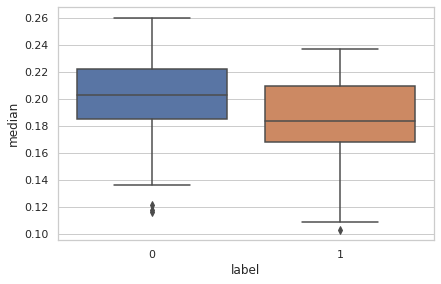

In [50]:
sns.boxplot(data=temp_df,y='median',x='label') # seeing the new 'median' against the 'label'.

In [51]:
temp_df['pear_skew']=temp_df['meanfreq']-temp_df['mode']
temp_df['pear_skew']=temp_df['pear_skew']/temp_df['sd']
temp_df.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,dfrange,modindx,label,pear_skew
3,0.302456,0.072111,0.128778,0.096582,0.207955,0.111374,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.554688,0.247119,1,3.031150
4,0.270241,0.079146,0.124834,0.078720,0.206045,0.127325,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,5.476562,0.208274,1,2.097126
5,0.265573,0.079557,0.126043,0.067958,0.209592,0.141634,0.963181,0.738307,0.112555,0.110132,0.017112,0.253968,0.298222,2.718750,0.125160,1,1.923371
6,0.301525,0.074463,0.129240,0.092899,0.205718,0.112819,0.967573,0.762638,0.086197,0.105945,0.026230,0.266667,0.479620,5.304688,0.123992,1,2.891735
8,0.284479,0.078018,0.167861,0.088206,0.208587,0.120381,0.970723,0.770992,0.219103,0.096729,0.017957,0.250000,0.336476,2.156250,0.148272,1,0.837952
16,0.381693,0.065790,0.143941,0.132280,0.244357,0.112076,0.938546,0.538810,0.050129,0.113323,0.017544,0.275862,1.434115,6.312500,0.254780,1,5.039700
18,0.336692,0.074121,0.132242,0.115756,0.239824,0.124068,0.934523,0.559742,0.060033,0.083484,0.015717,0.231884,0.146563,3.117188,0.059537,1,3.732540
21,0.362031,0.074369,0.140663,0.128673,0.254175,0.125502,0.915284,0.475317,0.059957,0.098643,0.016145,0.275862,0.209844,3.687500,0.059940,1,4.061809
32,0.351319,0.071652,0.161910,0.131058,0.256527,0.125469,0.876749,0.403910,0.134411,0.132726,0.016563,0.228571,0.257812,0.640625,0.203437,1,3.027258
33,0.349651,0.071533,0.156550,0.123529,0.247059,0.123529,0.875392,0.436706,0.120000,0.124685,0.016754,0.250000,0.799006,4.164062,0.205816,1,3.210434


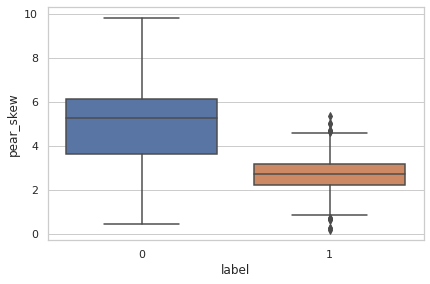

In [52]:
sns.boxplot(data=temp_df,y='pear_skew',x='label') # plotting new 'skewness' against the 'label'.

## Preparing the Data

In [0]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(temp_df.drop('label',axis=1))
X=scaled_df
Y=df['label'].to_numpy()

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

## Modelling

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve


In [0]:
def plot_confusion(y_test, pred, model_name):
    cm = confusion_matrix(y_test, pred)
    cm_flat = cm.flatten()
    tp = cm_flat[0]
    fp=cm_flat[1]
    fn=cm_flat[2]
    tn=cm_flat[3]
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    print("Precision: "+str(precision)+"\nRecall: "+str(recall)+"\nF1 Score: "+str(f1_score))
    group_counts = [str(value) for value in
                    cm_flat]
    f, ax = plt.subplots(figsize = (7,7))
    group_names = ["True Negative","False Positive","False Negative","True Positive"]
    labels = [ v1+"\n"+v2 for v1, v2 in
              zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cm, annot = labels, fmt = "", ax = ax)
    plt.title('Confusion Matrix of the '+model_name)
    plt.xlabel("Prediction")
    plt.ylabel("True")
    plt.show()
    


In [0]:
def plot_roc(y_test, pred, model_name):
#     pred = pred[:, 1]
    # calculate scores
    ns_probs = [0 for _ in range(len(y_test))]
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, pred)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print(model_name+': ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, pred)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=model_name)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()


In [0]:

def plot_learning_curve(clfr, X_train, Y_train, model_name):
    train_sizes, train_scores, test_scores = learning_curve(estimator=clfr,
                                                           X=X_train,
                                                           y=y_train,
                                                           train_sizes=np.linspace(0.1, 1.0, 10),
                                                           cv=10)

    # Mean value of accuracy against training data
    train_mean = np.mean(train_scores, axis=1)

    # Standard deviation of training accuracy per number of training samples
    train_std = np.std(train_scores, axis=1)

    # Same as above for test data
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot training accuracies 
    plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
    # Plot the variance of training accuracies
    plt.fill_between(train_sizes,
                    train_mean + train_std,
                    train_mean - train_std,
                    alpha=0.15, color='red')

    # Plot for test data as training data
    plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
            label='Test Accuracy')
    plt.fill_between(train_sizes,
                    test_mean + test_std,
                    test_mean - test_std,
                    alpha=0.15, color='blue')
    plt.title('Learning curve for '+model_name)
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


#### LOGISTIC REGRESSSION

Precision: 0.9788732394366197
Recall: 0.9788732394366197
F1 Score: 0.9788732394366197


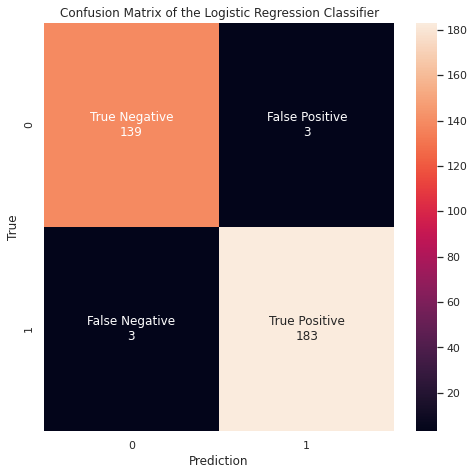

No Skill: ROC AUC=0.500
Logistic Regression Classifier: ROC AUC=0.981


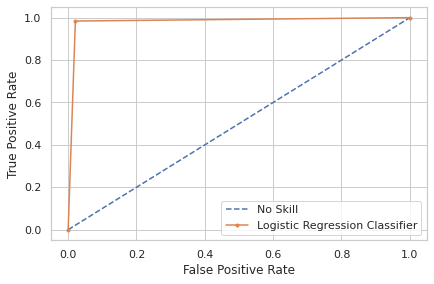

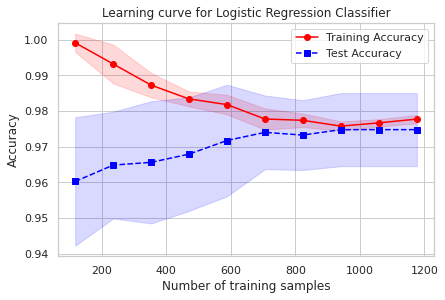

Validation Accuracy: 0.9817073170731707


In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
clf_lr=LogisticRegression()
clf_lr.fit(x_train,y_train)
pred=clf_lr.predict(x_test)
plot_confusion(y_test, pred, "Logistic Regression Classifier")
plot_roc(y_test, pred, "Logistic Regression Classifier")
plot_learning_curve(clf_lr, x_train, y_train, "Logistic Regression Classifier")
print("Validation Accuracy: "+str(accuracy_score(pred,y_test)))

#### Support Vector Machine (SVM)

Precision: 0.9859154929577465
Recall: 0.9929078014184397
F1 Score: 0.9893992932862191


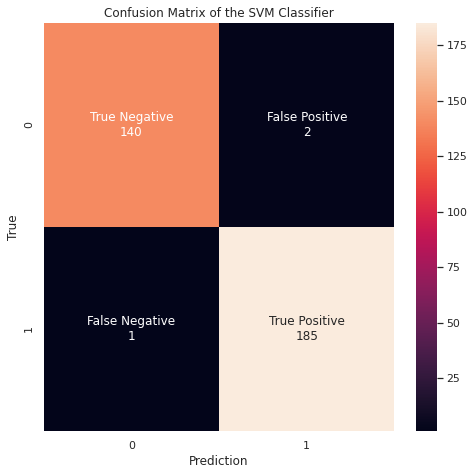

No Skill: ROC AUC=0.500
SVM Classifier: ROC AUC=0.990


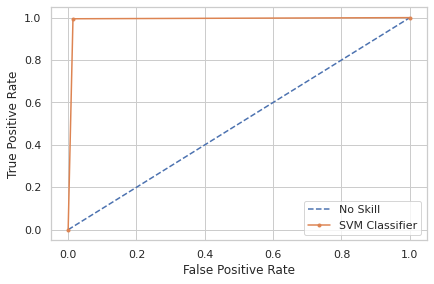

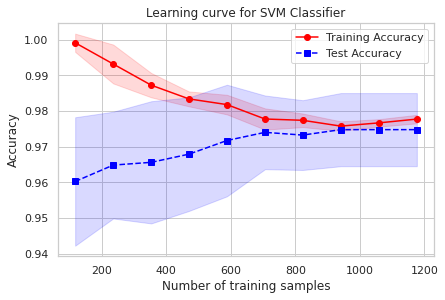

Validation Accuracy: 0.9908536585365854


In [62]:
clf_svm=SVC()
clf_svm.fit(x_train,y_train)
pred=clf_svm.predict(x_test)
plot_confusion(y_test, pred, "SVM Classifier")
plot_roc(y_test, pred, "SVM Classifier")
plot_learning_curve(clf_lr, x_train, y_train, "SVM Classifier")
print("Validation Accuracy: "+str(accuracy_score(pred,y_test)))

#### RANDOM FOREST

Precision: 0.9859154929577465
Recall: 0.9722222222222222
F1 Score: 0.979020979020979


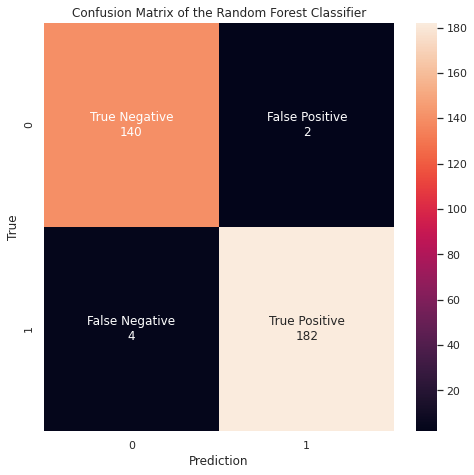

No Skill: ROC AUC=0.500
Random Forest Classifier: ROC AUC=0.982


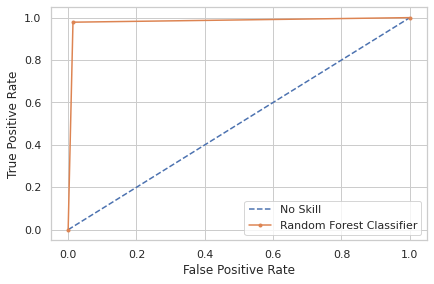

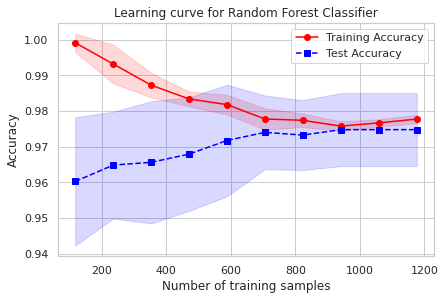

Validation Accuracy: 0.9817073170731707


In [63]:
clf_rf=RandomForestClassifier()
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
plot_confusion(y_test, pred, "Random Forest Classifier")
plot_roc(y_test, pred, "Random Forest Classifier")
plot_learning_curve(clf_lr, x_train, y_train, "Random Forest Classifier")
print("Validation Accuracy: "+str(accuracy_score(pred,y_test)))

#### GRADIENT BOOSTING

Precision: 0.971830985915493
Recall: 0.971830985915493
F1 Score: 0.971830985915493


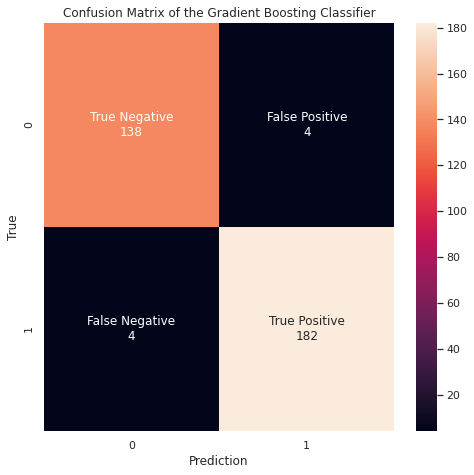

No Skill: ROC AUC=0.500
Gradient Boosting Classifier: ROC AUC=0.975


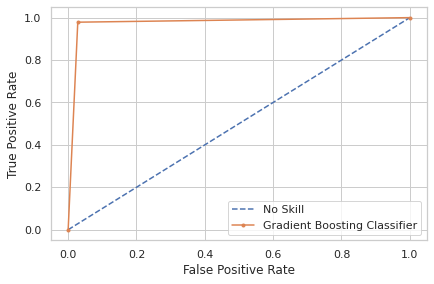

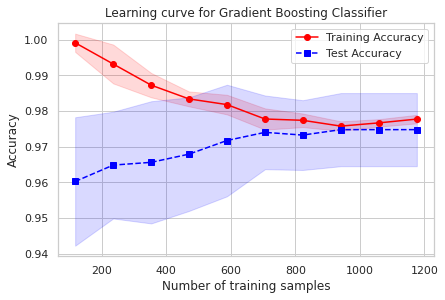

Validation Accuracy: 0.975609756097561


In [64]:
clf_gb=GradientBoostingClassifier()
clf_gb.fit(x_train,y_train)
pred=clf_gb.predict(x_test)
plot_confusion(y_test, pred, "Gradient Boosting Classifier")
plot_roc(y_test, pred, "Gradient Boosting Classifier")
plot_learning_curve(clf_lr, x_train, y_train, "Gradient Boosting Classifier")
print("Validation Accuracy: "+str(accuracy_score(pred,y_test)))

In [0]:
models=[LogisticRegression(),SVC(kernel='rbf'),RandomForestClassifier(),GradientBoostingClassifier()]
model_names=['Logistic Regression','SVM','Random Forest Classifier',
             'Gradient Boosting Classifier']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Technique':model_names,'Accuracy':acc}

In [66]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Technique,Accuracy
0,Logistic Regression,0.981707
1,SVM,0.990854
2,Random Forest Classifier,0.981707
3,Gradient Boosting Classifier,0.978659


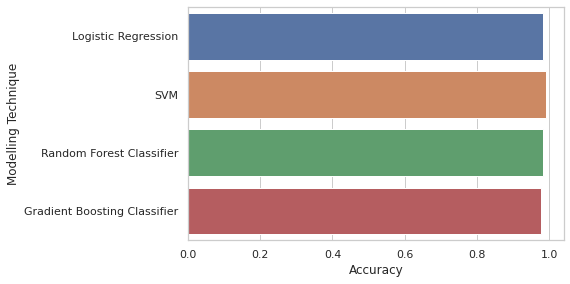

In [67]:
sns.barplot(y='Modelling Technique',x='Accuracy',data=acc_frame)